### Kinshuk Jagdev


**AIM:**
You are required to develop a Convolution neural network which should correctly classify the handwritten digits from 0-9 based on the pixel values given as features. Thus, this is a 10-class classification problem.

## Loading Dataset and Importing Libraries

In [ ]:
import numpy as np
import random
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D 
from keras import backend as K
from keras.utils import np_utils
import matplotlib.pyplot as plt

#Data Used: MNIST

Splitting Training and Testing Data 

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
#Printing the shape of training dataset
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [ ]:
#Printing the shape of testing dataset
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


### Data Size Reduction as Data size is large

In [ ]:
sam = np.random.randint(x_train.shape[0], size=25000) # sample 20k indices from 0-60
x_train = x_train[sam, :]
y_train = y_train[sam]
print(x_train.shape)
print(y_train.shape)

(25000, 28, 28)
(25000,)


## Reshaping Data

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

Data Conversion to float as it is considered better

In [ ]:
x_train = x_train.astype('float32')

x_test = x_test.astype('float32')

### Viewing New Modified Data

In [ ]:
print(x_train.shape)
print(y_train.shape)

(25000, 28, 28, 1)
(25000,)


In [ ]:
print("New Test Data Shape")
print(x_test.shape)
print(y_test.shape)

New Test Data Shape
(10000, 28, 28, 1)
(10000,)


### One-Hot Encoding

Even though we have data, we can't directiy feed it into the network, that is why we have to perform ont-hot encoding.

Function used: **np_utils.to_categorical()**

In [ ]:
n_classes = 10 #as predicting classes are 0-9(total 10)
print("Shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (25000,)
Shape after one-hot encoding:  (25000, 10)


## CNN Model Building

#### Model Specifications
1. Padding Used: **Same Padding**.
2. Activation Function for output: **Softmax**
3. Layers: 10
4. Model Type: **Sequential CNN** 
5. Non-Linearitry Function: **Relu**

In [ ]:
model = Sequential()

Adding Convulational Layers

In [ ]:
model.add(Conv2D(8, kernel_size=(3, 3), padding='same',activation='relu', input_shape=(28, 28, 1)))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(16, kernel_size=(3, 3), padding='same',activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

Using Flatten on model

In [ ]:
model.add(Flatten())

Adding Fully Connected Layers

In [ ]:
model.add(Dense(256, activation='relu'))

In [ ]:
model.add(Dense(256, activation='relu'))

Final Output Layer Using Softmax, Using 10 outputs as MNIST has 10 digits

In [ ]:
model.add(Dense(10, activation='softmax'))

## Viewing the built model

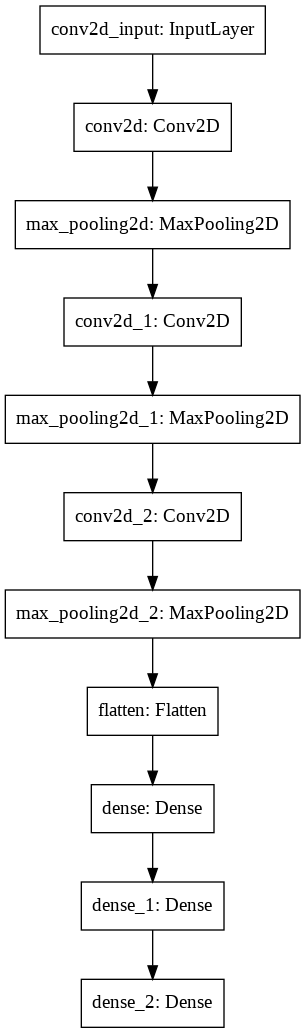

In [ ]:
# Plotting model 
from keras.utils import plot_model
plot_model(model,to_file='model_plot.png',show_shapes=False,show_layer_names=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0

## Compiling and Fitting the model

1. Loss: Cross Entropy
2. Optimizer: Adam
3. Epoches: 10

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
history = model.fit(x_train, y_train, batch_size=200, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
125/125 [==============================] - 12s 90ms/step - loss: 4.0227 - accuracy: 0.5965 - val_loss: 0.2151 - val_accuracy: 0.9338
Epoch 2/10
125/125 [==============================] - 12s 94ms/step - loss: 0.1601 - accuracy: 0.9509 - val_loss: 0.1465 - val_accuracy: 0.9550
Epoch 3/10
125/125 [==============================] - 12s 92ms/step - loss: 0.0911 - accuracy: 0.9705 - val_loss: 0.1195 - val_accuracy: 0.9627
Epoch 4/10
125/125 [==============================] - 12s 93ms/step - loss: 0.0691 - accuracy: 0.9778 - val_loss: 0.1216 - val_accuracy: 0.9622
Epoch 5/10
125/125 [==============================] - 12s 92ms/step - loss: 0.0404 - accuracy: 0.9872 - val_loss: 0.1038 - val_accuracy: 0.9682
Epoch 6/10
125/125 [==============================] - 12s 94ms/step - loss: 0.0270 - accuracy: 0.9920 - val_loss: 0.0883 - val_accuracy: 0.9744
Epoch 7/10
125/125 [==============================] - 12s 94ms/step - loss: 0.0224 - accuracy: 0.9934 - val_loss: 0.0829 - val_accuracy:

Model Accuracy: %

## Model Evaluation

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']

Training and Validation Accuracy

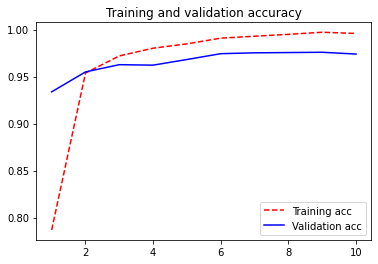

In [ ]:
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r--', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend() 

Training and Accuracy Loss

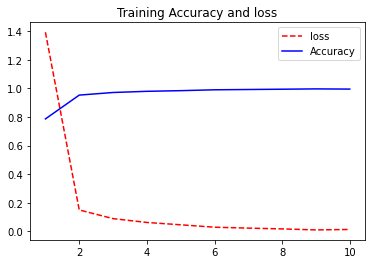

In [ ]:
plt.plot(epochs, loss, 'r--', label='loss')
plt.plot(epochs, acc, 'b', label='Accuracy')
plt.title('Training Accuracy and loss')
plt.legend()

plt.show()

Training and Testing Loss

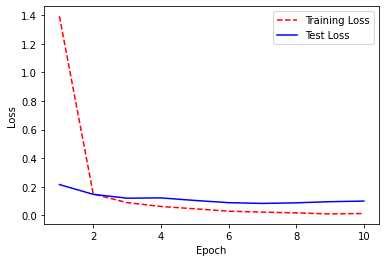

In [ ]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

## Train vs Test Evaluation

[[2.1247957e-11 3.7857342e-11 8.3450704e-09 1.5857514e-10 4.6790799e-13
  8.0388257e-13 1.0780155e-17 1.0000000e+00 1.9747466e-13 3.0271249e-10]
 [6.2004796e-13 3.3276553e-06 9.9999666e-01 1.7234893e-10 2.1014584e-13
  7.6228368e-13 4.5216540e-14 6.2496645e-15 2.6870797e-12 2.0454020e-18]
 [2.2665751e-11 1.0000000e+00 7.2740811e-12 4.0048442e-15 1.0919408e-09
  4.1453898e-12 1.6711506e-10 8.0721946e-10 3.1105474e-10 2.1131760e-11]
 [9.9463046e-01 1.7856869e-09 9.9016179e-06 4.0988337e-07 6.8383082e-07
  5.1797666e-05 1.3262876e-05 1.8911758e-06 4.7624549e-03 5.2922423e-04]
 [1.9805159e-15 3.9396448e-14 6.5540123e-15 3.7417513e-22 1.0000000e+00
  4.5931813e-18 6.3563665e-15 1.5596277e-14 2.5860831e-14 1.2485135e-09]
 [1.6733074e-13 1.0000000e+00 4.9204130e-13 2.0759555e-18 1.4914204e-11
  4.0407529e-15 3.3594517e-13 8.7847654e-12 6.3312684e-12 4.1088069e-13]]


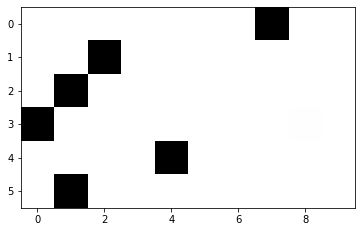

In [ ]:
#predict first 6 images in the test set
abc = model.predict(x_test[:6])
print(abc)
plt.imshow(abc, cmap = plt.cm.binary)
plt.show()

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


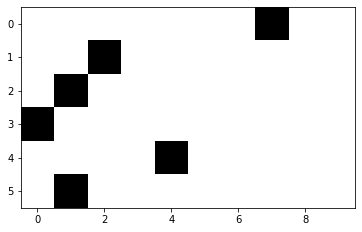

In [ ]:
#actual results for first 6 images in test set
td = y_test[:6]
print(td)
plt.imshow(td, cmap = plt.cm.binary)
plt.show()

### Conclusion
The Model is working as expected, and is yielding good results. This is the best model we could build at the moment, however we recognize that better approaches are available.